# TABLE OF CONTENTS
.Import Libraries 
.Read Data 
.Feature Selection 
.Explore Data 
.EDA 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READ DATA

In [16]:
data = pd.read_csv('listings.csv.gz')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


In [17]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Feature Selection

In [18]:
columns= ['host_is_superhost'  , 'neighbourhood_cleansed' , 'property_type' , 'room_type' , 'accommodates' , 'bedrooms' ,
         'beds' , 'price' , 'minimum_nights' , 'maximum_nights' , 'review_scores_rating' , 'reviews_per_month' ,
         'instant_bookable' , 'has_availability' , 'calculated_host_listings_count' ]
data = data[columns]
data

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,instant_bookable,has_availability,calculated_host_listings_count
0,t,Noord-Oost,Private room in condo,Private room,1,NaN,1.0,$61.00,3,365,4.74,2.30,t,t,2
1,f,Westerpark,Entire rental unit,Entire home/apt,2,1.0,1.0,$327.00,3,1125,4.83,0.64,t,t,1
2,t,Westerpark,Private room in boat,Private room,2,NaN,1.0,$109.00,2,730,4.82,2.73,t,t,3
3,f,Zuid,Houseboat,Entire home/apt,4,3.0,3.0,$290.00,3,35,5.00,0.11,f,t,1
4,t,Centrum-West,Private room in rental unit,Private room,2,NaN,1.0,$150.00,1,5,4.89,6.62,f,t,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,f,Oud-Noord,Entire rental unit,Entire home/apt,2,1.0,1.0,$250.00,3,7,NaN,NaN,f,t,1
8382,f,Oud-Noord,Entire home,Entire home/apt,8,3.0,3.0,$337.00,3,365,NaN,NaN,f,t,1
8383,f,Bos en Lommer,Entire rental unit,Entire home/apt,2,1.0,1.0,$135.00,6,365,NaN,NaN,t,t,1
8384,f,Centrum-West,Room in hotel,Private room,2,1.0,1.0,$160.00,5,5,NaN,NaN,f,t,1


In [19]:
data.columns

Index(['host_is_superhost', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'reviews_per_month', 'instant_bookable', 'has_availability',
       'calculated_host_listings_count'],
      dtype='object')

# Explore Data

In [20]:
data.shape

(8386, 15)

In [21]:
data.dtypes

host_is_superhost                  object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
bedrooms                          float64
beds                              float64
price                              object
minimum_nights                      int64
maximum_nights                      int64
review_scores_rating              float64
reviews_per_month                 float64
instant_bookable                   object
has_availability                   object
calculated_host_listings_count      int64
dtype: object

In [22]:
data.isna().sum()

host_is_superhost                   70
neighbourhood_cleansed               0
property_type                        0
room_type                            0
accommodates                         0
bedrooms                          1428
beds                                73
price                                0
minimum_nights                       0
maximum_nights                       0
review_scores_rating               830
reviews_per_month                  830
instant_bookable                     0
has_availability                     0
calculated_host_listings_count       0
dtype: int64

In [26]:
def handle_missing_data (data,drop=False):
    if drop==True:
        data.dropna(inplace=True)
    else:
        col=data[data.isna()].columns
        for c in col:
            if data[c].dtype == 'object':
                mode_value = data[c].mode()[0]
                data[c] . fillna ( mode_value , inplace=True)
            elif data[c].dtype == 'int64' or data[c].dtype == 'float64':
                mean_value = data[c].mean()
                data[c]. fillna (mean_value,inplace = True)
            elif data[c].dtype == 'bool':
                mode_value = data[c].mode()[0]
                data[c].fillna (mode_value,inplace=True)
handle_missing_data(data)
data.isna().sum()

host_is_superhost                 0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
review_scores_rating              0
reviews_per_month                 0
instant_bookable                  0
has_availability                  0
calculated_host_listings_count    0
dtype: int64

In [29]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,8386.0,2.901741,1.328242,1.00,2.00,2.000000,4.000000,16.00
bedrooms,8386.0,1.664128,0.856702,1.00,1.00,1.664128,2.000000,17.00
beds,8386.0,1.831348,1.434956,1.00,1.00,1.000000,2.000000,33.00
minimum_nights,8386.0,5.046625,34.710395,1.00,2.00,3.000000,4.000000,1001.00
maximum_nights,8386.0,392.113880,468.415526,1.00,20.00,60.000000,1125.000000,1125.00
review_scores_rating,8386.0,4.829337,0.264426,0.00,4.79,4.880000,5.000000,5.00
reviews_per_month,8386.0,1.175696,2.139257,0.01,0.30,0.680000,1.175696,120.11
calculated_host_listings_count,8386.0,1.831624,2.857336,1.00,1.00,1.000000,1.000000,27.00


In [33]:
data.describe(include='object').transpose()

,count,unique,top,freq
host_is_superhost,8386,2,f,6784
neighbourhood_cleansed,8386,22,De Baarsjes - Oud-West,1382
property_type,8386,60,Entire rental unit,3360
room_type,8386,4,Entire home/apt,6477
price,8386,631,$200.00,318
instant_bookable,8386,2,f,6867
has_availability,8386,2,t,8061


In [36]:
data[data.duplicated]

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,instant_bookable,has_availability,calculated_host_listings_count
6651,t,Centrum-West,Room in hotel,Private room,2,1.000000,2.0,$190.00,1,365,4.890000,2.180000,f,t,14
7292,f,Centrum-West,Private room in home,Private room,2,1.664128,1.0,$279.00,2,30,4.829337,1.175696,f,t,2
7542,t,De Aker - Nieuw Sloten,Private room in home,Private room,2,1.664128,2.0,$99.00,3,365,5.000000,3.000000,t,t,27
7723,f,Watergraafsmeer,Room in hotel,Private room,1,1.000000,1.0,$115.00,1,365,4.829337,1.175696,t,t,11
7727,f,Watergraafsmeer,Room in hotel,Private room,1,1.000000,1.0,$115.00,1,365,4.829337,1.175696,t,t,11
7729,f,Watergraafsmeer,Room in hotel,Private room,1,1.000000,1.0,$115.00,1,365,4.829337,1.175696,t,t,11
7816,f,Watergraafsmeer,Room in hotel,Private room,1,1.000000,1.0,$100.00,1,365,4.829337,1.175696,t,t,11
8152,f,Buitenveldert - Zuidas,Room in hotel,Private room,2,1.000000,1.0,$237.00,1,365,4.829337,1.175696,t,t,9
8153,t,Zuid,Room in hotel,Private room,2,1.000000,1.0,$143.00,1,365,5.000000,1.000000,t,t,10
8154,f,Buitenveldert - Zuidas,Room in hotel,Private room,2,1.000000,1.0,$237.00,1,365,4.829337,1.175696,t,t,9


In [37]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,instant_bookable,has_availability,calculated_host_listings_count


# EDA

In [39]:
# how many host have superhost ?
data.host_is_superhost.value_counts()

f    6773
t    1592
Name: host_is_superhost, dtype: int64

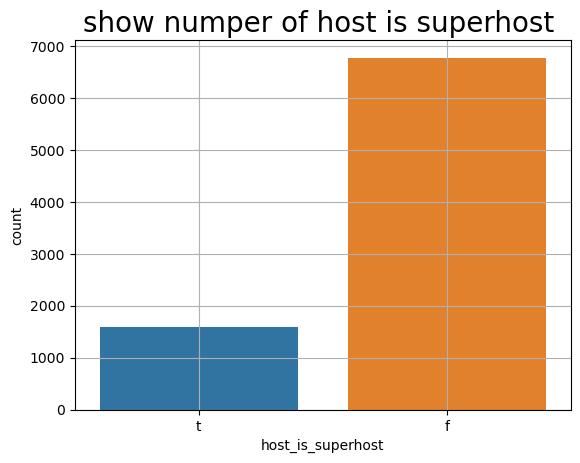

In [50]:
sns.countplot(x='host_is_superhost',data=data)
plt.grid(True)
plt.title('show numper of host is superhost ',fontsize=20)
plt.show()

In [51]:
data.has_availability.value_counts()

t    8040
f     325
Name: has_availability, dtype: int64

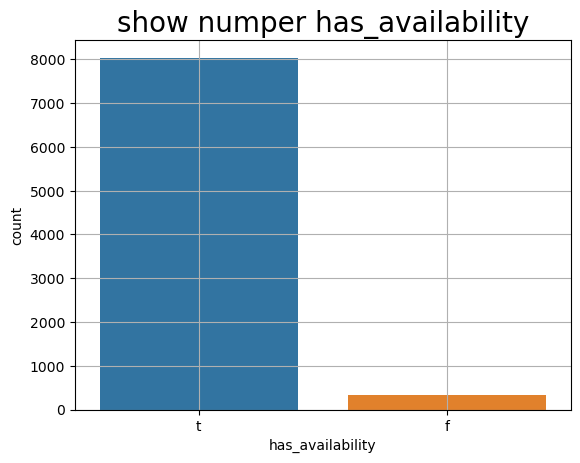

In [54]:
sns.countplot(x='has_availability',data=data)
plt.grid(True)
plt.title('show numper has_availability',fontsize=20)
plt.show()

In [55]:
data.instant_bookable.value_counts()

f    6864
t    1501
Name: instant_bookable, dtype: int64

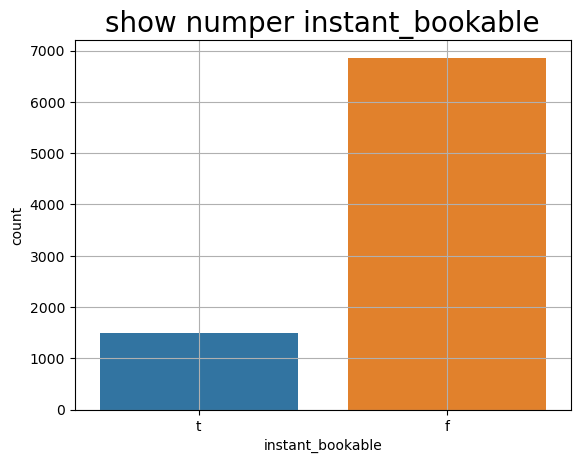

In [56]:
sns.countplot(x='instant_bookable',data=data)
plt.grid(True)
plt.title('show numper instant_bookable',fontsize=20)
plt.show()

In [57]:
#how many host have superhost and availability ?
pd.crosstab(data.host_is_superhost,data.has_availability)

has_availability,f,t
host_is_superhost,,
f,321,6452
t,4,1588


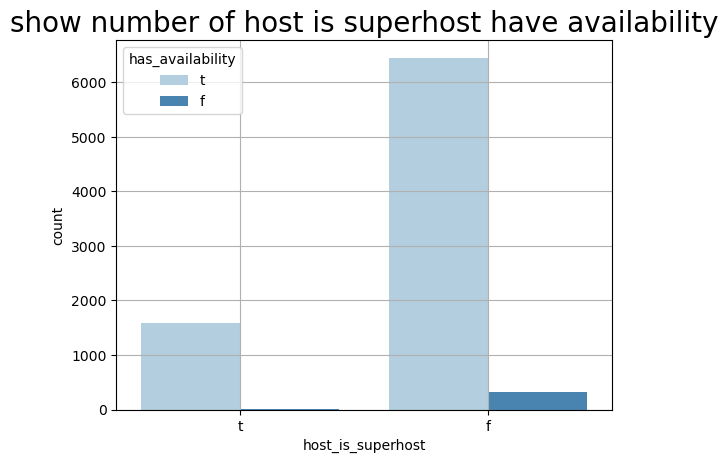

In [62]:
sns.countplot(x='host_is_superhost',hue='has_availability',data=data, palette = 'Blues')
plt.grid(True)
plt.title('show number of host is superhost have availability',fontsize=20)
plt.show()

In [63]:
#how many host have superhost and bookable ?
pd.crosstab(data.host_is_superhost,data.instant_bookable)

instant_bookable,f,t
host_is_superhost,,
f,5682,1091
t,1182,410


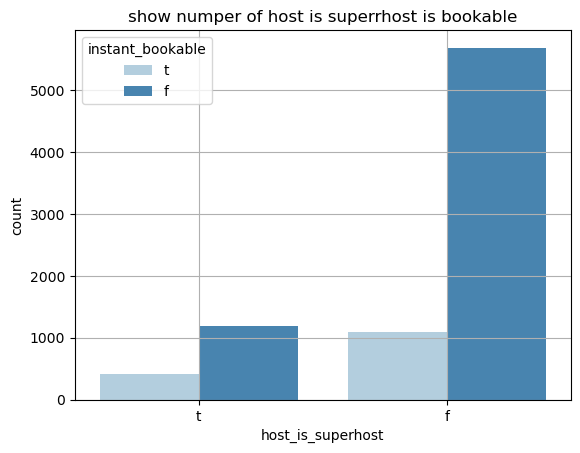

In [66]:
sns.countplot(x='host_is_superhost',hue='instant_bookable',data=data,palette='Blues')
plt.grid(True)
plt.title('show numper of host is superrhost is bookable')
plt.show()

In [67]:
#how many host have availability and bookable
pd.crosstab(data.has_availability,data.instant_bookable)

instant_bookable,f,t
has_availability,,
f,325,0
t,6539,1501


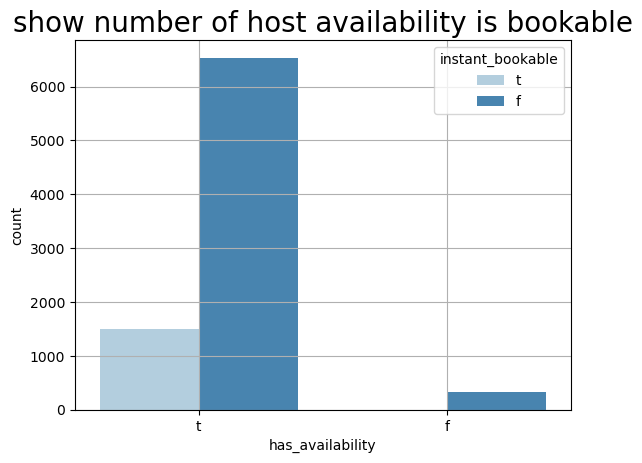

In [73]:
sns.countplot(x='has_availability',hue='instant_bookable',data=data,palette='Blues')
plt.grid(True)
plt.title('show number of host availability is bookable',fontsize=20)
plt.show()

In [74]:
#how many host have superhost,availability and bookable ?
data.groupby(['has_availability','instant_bookable','host_is_superhost'])['host_is_superhost'].count()

has_availability  instant_bookable  host_is_superhost
f                 f                 f                     321
                                    t                       4
t                 f                 f                    5361
                                    t                    1178
                  t                 f                    1091
                                    t                     410
Name: host_is_superhost, dtype: int64

In [75]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)
data.price

C:\Users\DELL\AppData\Local\Temp\ipykernel_15720\15115696.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)


0        61.0
1       327.0
2       109.0
3       290.0
4       150.0
        ...  
8381    250.0
8382    337.0
8383    135.0
8384    160.0
8385    211.0
Name: price, Length: 8365, dtype: float64

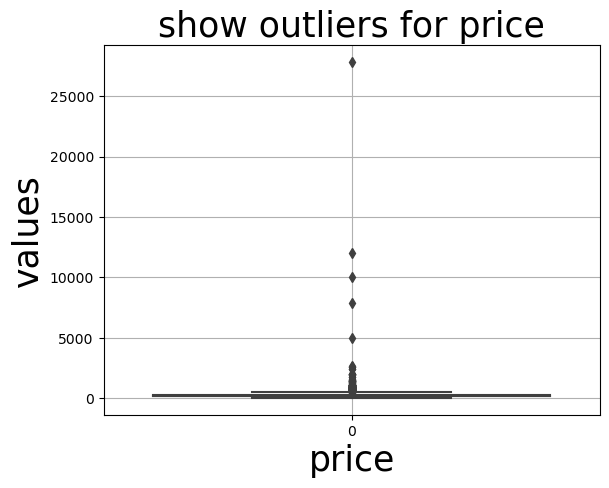

In [77]:
sns.boxplot(data=data.price)
plt.title('show outliers for price',fontsize=25)
plt.grid(True)
plt.xlabel('price',fontsize=25)
plt.ylabel('values',fontsize=25)
plt.show()

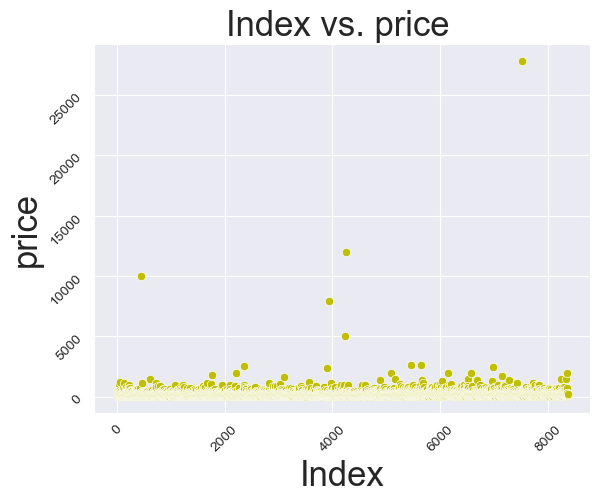

In [80]:
sns.set_style('darkgrid')
sns.scatterplot(x=np.arange(len(data)), y='price' , color='y',data=data)
plt.title ('Index vs. price ',fontsize=25)
plt.xlabel('Index',fontsize=25)
plt.ylabel('price',fontsize=25)
plt.show()

In [81]:
#Show the top 20 values of the property type
data.property_type.value_counts().sort_values(ascending=False).head(20)

Entire rental unit                   3358
Entire condo                         1522
Entire home                           711
Private room in rental unit           479
Private room in bed and breakfast     300
Entire townhouse                      236
Entire loft                           198
Private room in condo                 179
Private room in home                  157
Houseboat                             155
Room in hotel                         127
Room in boutique hotel                109
Boat                                  101
Private room in houseboat              91
Private room in townhouse              82
Private room in guest suite            81
Entire serviced apartment              57
Private room in boat                   48
Private room in loft                   39
Entire guest suite                     26
Name: property_type, dtype: int64

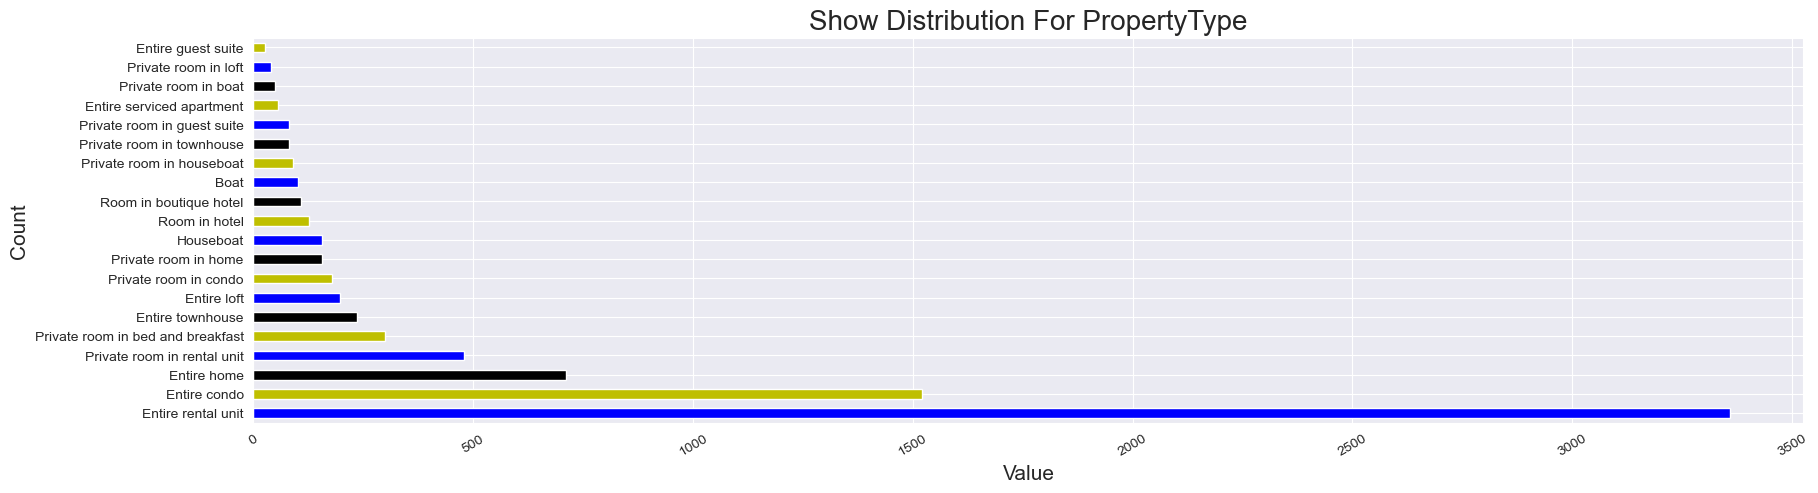

In [82]:
plt.figure(figsize=(20,5))
data.property_type.value_counts().sort_values(ascending=False).head(20).plot.barh(color=['b','y','Black'])
plt.title("Show Distribution For PropertyType",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

In [83]:
#Show the top 20 values of the neighbourhood
data.neighbourhood_cleansed.value_counts().sort_values(ascending=False).head(20)

De Baarsjes - Oud-West                    1382
Centrum-West                              1003
De Pijp - Rivierenbuurt                    934
Centrum-Oost                               793
Zuid                                       591
Westerpark                                 584
Oud-Oost                                   506
Bos en Lommer                              424
Oud-Noord                                  402
Oostelijk Havengebied - Indische Buurt     320
Watergraafsmeer                            258
Noord-West                                 218
IJburg - Zeeburgereiland                   183
Slotervaart                                164
Noord-Oost                                 137
Geuzenveld - Slotermeer                    116
Buitenveldert - Zuidas                      96
De Aker - Nieuw Sloten                      73
Gaasperdam - Driemond                       51
Bijlmer-Centrum                             47
Name: neighbourhood_cleansed, dtype: int64

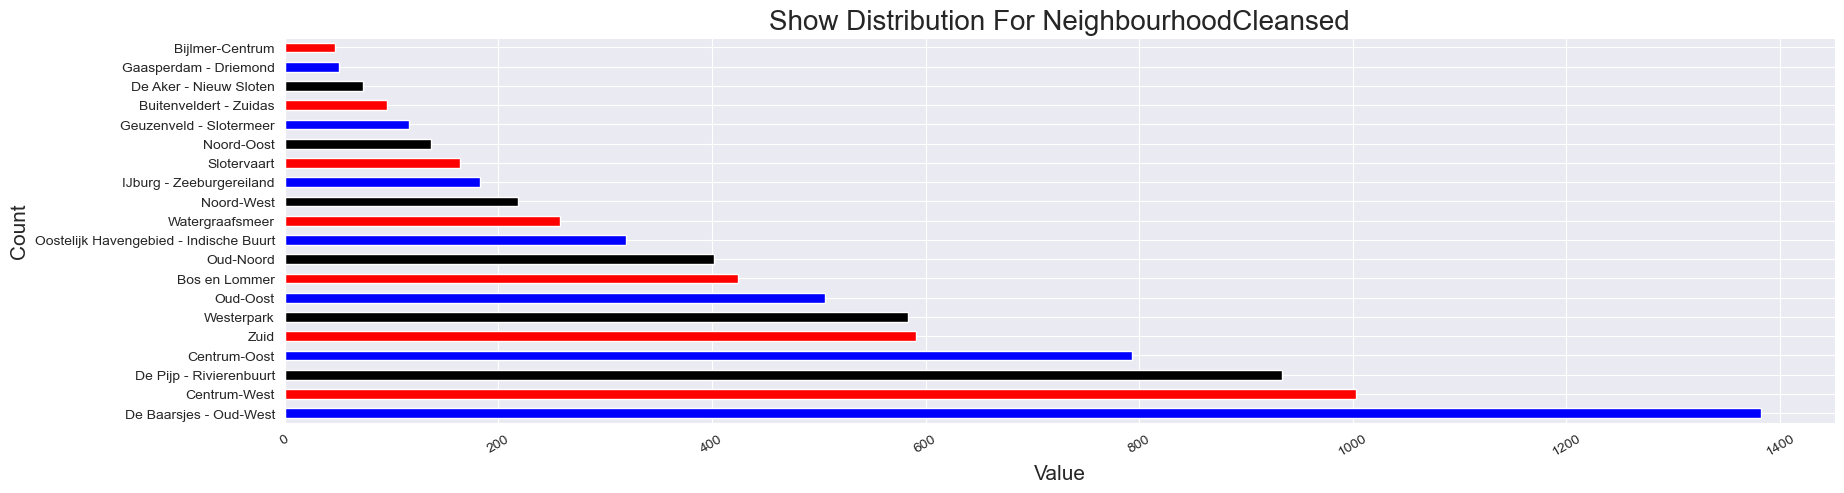

In [85]:
plt.figure(figsize=(20,5))
data.neighbourhood_cleansed.value_counts().sort_values(ascending=False).head(20).plot.barh(color=['b','r','Black'])
plt.title("Show Distribution For NeighbourhoodCleansed",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

In [86]:
#Show the distrubition of RoomType
data.room_type.value_counts()

Entire home/apt    6475
Private room       1794
Hotel room           54
Shared room          42
Name: room_type, dtype: int64

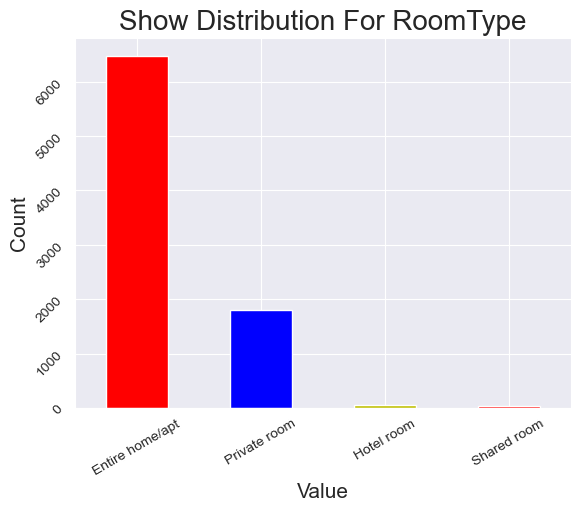

In [87]:
data.room_type.value_counts().plot(kind='bar',color=['r','b','y'])
plt.title("Show Distribution For RoomType",fontsize=20)             
plt.ylabel('Count',fontsize=15)
plt.xlabel('Value',fontsize=15)
plt.grid(True)
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.show()

,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month,calculated_host_listings_count
accommodates,1.000000,0.692360,0.807522,0.227281,-0.002992,-0.008888,-0.015524,-0.048505,0.000644
bedrooms,0.692360,1.000000,0.726176,0.188420,-0.001225,-0.028351,0.016804,-0.059174,-0.040937
beds,0.807522,0.726176,1.000000,0.189280,-0.007994,-0.000746,-0.033831,-0.024223,0.018924
price,0.227281,0.188420,0.189280,1.000000,-0.003564,-0.021822,0.029018,-0.037920,0.005952
minimum_nights,-0.002992,-0.001225,-0.007994,-0.003564,1.000000,0.041206,0.013614,-0.022878,0.028659
maximum_nights,-0.008888,-0.028351,-0.000746,-0.021822,0.041206,1.000000,-0.057338,0.036299,0.049777
review_scores_rating,-0.015524,0.016804,-0.033831,0.029018,0.013614,-0.057338,1.000000,-0.050825,-0.157184
reviews_per_month,-0.048505,-0.059174,-0.024223,-0.037920,-0.022878,0.036299,-0.050825,1.000000,0.091643
calculated_host_listings_count,0.000644,-0.040937,0.018924,0.005952,0.028659,0.049777,-0.157184,0.091643,1.000000


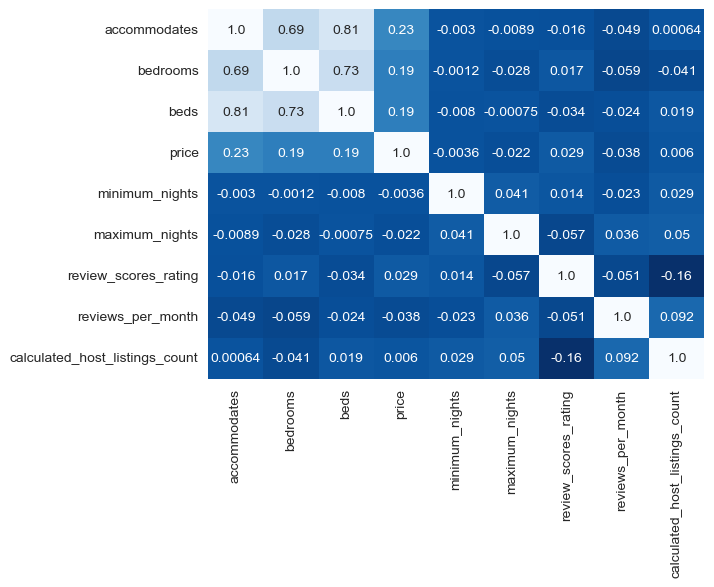

In [88]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,fmt='.2',cbar=False,cmap='Blues_r')
data.select_dtypes(include='number').corr()